In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 30s 2us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [ ]:
x_train[0]
len(x_train[0])

In [47]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
y_train[0]

1.0

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [51]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [53]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 30s 2ms/sample - loss: 0.5085 - acc: 0.7861 - val_loss: 0.3743 - val_acc: 0.8767
Epoch 2/20
15000/15000 [==============================] - 18s 1ms/sample - loss: 0.3006 - acc: 0.9030 - val_loss: 0.3013 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 207us/sample - loss: 0.2197 - acc: 0.9303 - val_loss: 0.2823 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 3s 182us/sample - loss: 0.1733 - acc: 0.9442 - val_loss: 0.2779 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 3s 181us/sample - loss: 0.1400 - acc: 0.9539 - val_loss: 0.2880 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 3s 201us/sample - loss: 0.1136 - acc: 0.9647 - val_loss: 0.2984 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 4s 250us/sample - loss: 0.0963 - acc: 0.9712 - val_los

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

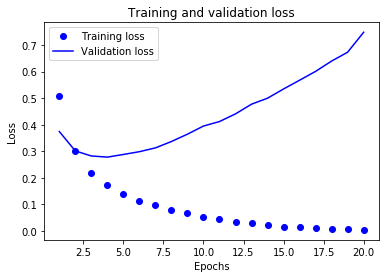

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

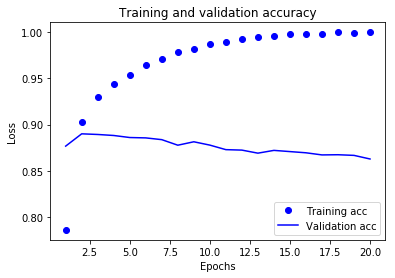

In [60]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 46s 2ms/sample - loss: 0.4479 - accuracy: 0.8280
Epoch 2/4
25000/25000 [==============================] - 4s 176us/sample - loss: 0.2582 - accuracy: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 118us/sample - loss: 0.1991 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 2s 96us/sample - loss: 0.1672 - accuracy: 0.9411
25000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [62]:
results

[0.2938196612739563, 0.8842]

In [65]:
model.predict(x_test).ipynb_checkpoints/

array([[0.21563354],
       [0.99979967],
       [0.7323224 ],
       ...,
       [0.10121262],
       [0.07287446],
       [0.6578163 ]], dtype=float32)